# SCC0275 - Introdução à Ciência de Dados - Segundo Projeto Prático

**Nome do(s) Aluno(s):** João Pedro Borges de Castro


## Código Auxiliar

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

## Questão 1

### a) Baixe os dados e carregue-os no Python.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciência de dados/hour.csv')
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### b) Entende o que cada coluna significa. Faça um histograma mostrando a distribuição da variável resposta (total de aluguéis) e um gráfico mostrando a relação entre a temperatura do dia e a variável resposta.

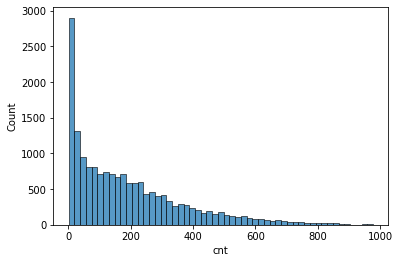

In [ ]:
y = df.cnt
sns.histplot(y)

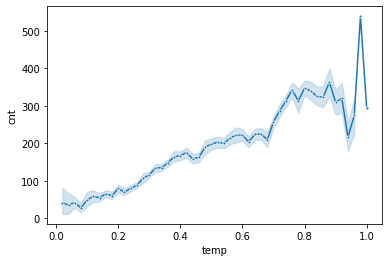

In [ ]:
sns.lineplot(data=df, x='temp', y='cnt', marker='.')

## Questão 2

### a) Diga quais variáveis (colunas) são explicativas (fazem parte do X).

As variáveis explicativas são 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'.

### b) Diga quais variáveis são futuras, mas não são a variável resposta (total de aluguéis naquela hora).

As variáveis 'casual' e 'registered', são variáveis futuras, e sua soma define a variável resposta.

### c) Diga quais colunas são metadados.

As colunas 'instant', 'dteday', 'yr' são metadados, pois, 'instant' é apenas um índice, enquanto 'dteday' e 'yr', são datas que não contribuirão para predição.

## Questão 3

### a) Divida a base em treino e teste. Mantenha os dados de 2011 no treinamento e use os de 2021 para teste.

In [ ]:
grouped = df.groupby(df.yr)
df_train = grouped.get_group(0)
df_test = grouped.get_group(1)

In [ ]:
# limpando a tabela
X_train = df_train.drop(['instant', 'dteday', 'yr', 'casual', 'registered', 'cnt'], axis=1)
y_train = df_train['cnt']
X_test = df_test.drop(['instant', 'dteday', 'yr', 'casual', 'registered', 'cnt'], axis=1)
y_test = df_test['cnt']

### b) Use o OneHotEncoder do sklearn para transformar todas as variáveis qualitativas em dummies. Lembre-se de analisar todas as variáveis para determinar corretamente quais são qualitativas.

In [ ]:
#considerando que 'season', 'mnth', 'hr', 'weekday', 'weathersit' são variáveis qualitativas
#treina o modelo
aux_X_train = X_train.drop(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], axis=1)
treino = OneHotEncoder(handle_unknown='ignore').fit(aux_X_train)

In [ ]:
#função para transformar as variáveis qualitativas de X em dummies, segundo o modelo anteriormente treinado
def encode(X, treino):
  aux_X = X.drop(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], axis=1)
  aux_part1 = treino.transform(aux_X).toarray()
  part1 = pd.DataFrame(aux_part1)
  aux_part2 = X.drop(['season', 'mnth', 'hr', 'weekday', 'weathersit'], axis=1)
  part2 = aux_part2.reset_index(drop=True)
  final = part2.join(part1)
  return final

In [ ]:
enc_X_train = encode(X_train, treino)
enc_X_test = encode(X_test, treino)

In [ ]:
enc_X_train.head(3)

,holiday,workingday,temp,atemp,hum,windspeed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0,0,0.24,0.2879,0.81,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0.22,0.2727,0.80,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,0,0.22,0.2727,0.80,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Questão 4

### Treine os seguintes modelos de rede neural na base de treino e compute os seus MAE (mean absolute error) na base de teste:

1. Modelo sem nenhuma camada intermediária;
2. Modelo com uma camada intermediária com 10 neurônios;
3. Modelo com duas camadas intermediárias com 10 neurônios cada.

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=[],
    random_state=42
).fit(enc_X_train, y_train)

mlp_res = mlp.predict(enc_X_test)

mean_absolute_error(y_test, mlp_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


188.39905570707515

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=[10],
    random_state=42
).fit(enc_X_train, y_train)

mlp_res = mlp.predict(enc_X_test)

mean_absolute_error(y_test, mlp_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


105.08684775941589

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=[10, 10],
    random_state=42
).fit(enc_X_train, y_train)

mlp_res = mlp.predict(enc_X_test)

mean_absolute_error(y_test, mlp_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


94.62865424895087

Temos como MAE, para o modelo sem camada intermediária 188.4, para o modelo com uma camada 105 e para o modelo com duas camadas 94.6.

Analisando a distribuição da variável resposta da questão 1)b), pode-se concluir que os modelos conseguiram uma boa precisão e que a adição de novas camadas melhora a precisão dos modelos.